In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.helper import plot
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
import math
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_classification, load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

sns.set()

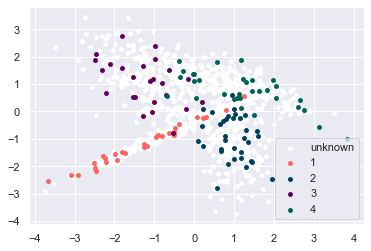

In [11]:
N = 220
X, Y = make_classification(n_classes=4, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, class_sep=1, random_state=2000, n_samples=1000)
X0 = list(X[:120])
Y0 = list(Y[:120])
X1 = list(X[120:])
# n_classes = max(Y)+1
# X0 = []
# Y0 = []
# for c in set(Y):
#     if c < n_classes/2:
#         X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:40]
#         Y0 += [y for y in Y if y==c][:40]
#     else:
#         X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:20]
#         Y0 += [y for y in Y if y==c][:20]
# X1 = [x for x in X if (list(x) not in list(X0))]
plot(X0, np.array(Y0)+1, X1)

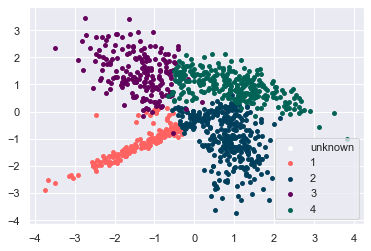

In [12]:
GL = GLMultiClass(X0, Y0, X1, sigm=1)
GL.solve()
plot(X, GL.Y+1, [])

2.0
0.0


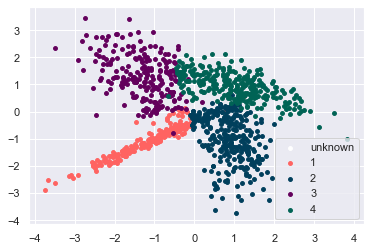

In [13]:
MBO = MBOMultiClass(X0, Y0, X1, sigm=1, dT=0.001)
MBO.solve()
plot(X,np.array(MBO.Y)+1,[])

## MNIST

In [14]:
N = 200

digits = load_digits()
X = [x.flatten()/digits.images.max() for x in digits.images]
Y = digits.target
n_classes = max(Y)+1
X0 = []
Y0 = []
for c in set(Y):
    if c%2 == 0:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:np.int16(N/n_classes)*2]
        Y0 += [y for y in Y if y==c][:np.int16(N/n_classes)*2]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:np.int16(N/(n_classes*2))]
        Y0 += [y for y in Y if y==c][:np.int16(N/(n_classes*2))]
X1 = [x for x in X if (list(x) not in list(X0))]

Y1_act = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
# X0 = list(X[:200])
# Y0 = list(Y[:200])
# X1 = list(X[200:])

In [15]:
Dim = np.array(X).shape[1]
GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
GL.solve()

In [16]:
y_true = Y[200:]
y_pred = GL.Y[200:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

Accuracy: 0.7244834063869756
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       157
           1       0.42      0.19      0.26       163
           2       0.85      0.86      0.86       157
           3       0.51      0.86      0.64       162
           4       0.99      0.85      0.91       162
           5       0.81      0.83      0.82       162
           6       0.95      0.88      0.92       160
           7       0.78      0.91      0.84       159
           8       0.51      0.88      0.64       155
           9       0.47      0.14      0.22       160

    accuracy                           0.72      1597
   macro avg       0.73      0.73      0.70      1597
weighted avg       0.73      0.72      0.70      1597

Confussion Matrix
[[137   2   0   6   0   2   0   5   5   0]
 [  0  31  22   3   0   6   5   4  92   0]
 [  0   4 135   3   0   1   0   7   3   4]
 [  1   2   0 139   0   5   0   4   8   3]
 [  0   4   0   2 137 

In [17]:
Dim = np.array(X).shape[1]
MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.05)
MBO.solve()

5.0
0.0


In [18]:
y_true = Y[200:]
y_pred = np.array(MBO.Y[200:])
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

Accuracy: 0.7370068879148404
              precision    recall  f1-score   support

           0       0.93      0.87      0.89       157
           1       0.53      0.28      0.37       163
           2       0.82      0.82      0.82       157
           3       0.76      0.69      0.72       162
           4       0.95      0.84      0.89       162
           5       0.77      0.69      0.73       162
           6       0.89      0.88      0.88       160
           7       0.81      0.87      0.84       159
           8       0.47      0.84      0.60       155
           9       0.60      0.62      0.61       160

    accuracy                           0.74      1597
   macro avg       0.75      0.74      0.74      1597
weighted avg       0.75      0.74      0.73      1597

Confussion Matrix
[[136   2   0   6   1   2   0   4   5   1]
 [  0  46  19   1   2   4  13   4  69   5]
 [  1   4 129   9   0   1   0   6   3   4]
 [  2   1   2 111   0   6   0   3  25  12]
 [  0   4   0   2 136 